<H1>Is there any NULL values in dataset?</H1>

we will have to divide our dataframe into 2 parts: for validation(20%) and for ml(80%). I haven't separated it
 yet. We will have to update this plots then.

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo

data = pd.read_csv('data/credit_score.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

As we see, there are no NULL values in our dataset and all columns (except CUST_ID) are numeric.

In [82]:
data.columns

Index(['CUST_ID', 'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
       'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6',
       'R_CLOTHING', 'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS',
       'R_CLOTHING_DEBT', 'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION',
       'R_EDUCATION_INCOME', 'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT',
       'T_ENTERTAINMENT_12', 'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT',
       'R_ENTERTAINMENT_INCOME', 'R_ENTERTAINMENT_SAVINGS',
       'R_ENTERTAINMENT_DEBT', 'T_FINES_12', 'T_FINES_6', 'R_FINES',
       'R_FINES_INCOME', 'R_FINES_SAVINGS', 'R_FINES_DEBT', 'T_GAMBLING_12',
       'T_GAMBLING_6', 'R_GAMBLING', 'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS',
       'R_GAMBLING_DEBT', 'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES',
       'R_GROCERIES_INCOME', 'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT',
       'T_HEALTH_12', 'T_HEALTH_6', 'R_HEALTH', 'R_HEALTH_INCOME',
       'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT', 'T_HOUSING_12', 'T_HOUSING_6',
 

In [83]:
data.describe()

INCOME       SAVINGS          DEBT  R_SAVINGS_INCOME  \
count    1000.000000  1.000000e+03  1.000000e+03       1000.000000   
mean   121610.019000  4.131896e+05  7.907180e+05          4.063477   
std    113716.699591  4.429160e+05  9.817904e+05          3.968097   
min         0.000000  0.000000e+00  0.000000e+00          0.000000   
25%     30450.250000  5.971975e+04  5.396675e+04          1.000000   
50%     85090.000000  2.738505e+05  3.950955e+05          2.545450   
75%    181217.500000  6.222600e+05  1.193230e+06          6.307100   
max    662094.000000  2.911863e+06  5.968620e+06         16.111200   

       R_DEBT_INCOME  R_DEBT_SAVINGS  T_CLOTHING_12  T_CLOTHING_6  \
count    1000.000000     1000.000000    1000.000000   1000.000000   
mean        6.068449        5.867252    6822.401000   3466.320000   
std         5.847878       16.788356    7486.225932   5118.942977   
min         0.000000        0.000000       0.000000      0.000000   
25%         1.454500        0.206200    1084.500000    319.500000   
50%         4.911550        2.000000    4494.000000   1304.000000   
75%         8.587475        4.509600   10148.500000   4555.500000   
max        37.000600      292.842100   43255.000000  39918.000000   

        R_CLOTHING  R_CLOTHING_INCOME  ...  R_EXPENDITURE_INCOME  \
count  1000.000000        1000.000000  ...           1000.000000   
mean      0.454848           0.055557  ...              0.943607   
std       0.236036           0.037568  ...              0.168989   
min       0.000000           0.003400  ...              0.666700   
25%       0.263950           0.029700  ...              0.833300   
50%       0.468850           0.046800  ...              0.909100   
75%       0.626300           0.069400  ...              1.000000   
max       1.058300           0.251700  ...              2.000200   

       R_EXPENDITURE_SAVINGS  R_EXPENDITURE_DEBT     CAT_DEBT  \
count            1000.000000         1000.000000  1000.000000   
mean                0.913340            0.605276     0.944000   
std                 1.625278            1.299382     0.230037   
min                 0.000000            0.000000     0.000000   
25%                 0.158700            0.100000     1.000000   
50%                 0.327950            0.178600     1.000000   
75%                 0.833300            0.588200     1.000000   
max                10.009900           10.005300     1.000000   

       CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
count      1000.000000   1000.000000          1000.000000      1000.00000   
mean          0.236000      0.173000             0.993000         0.15000   
std           0.424835      0.378437             0.083414         0.35725   
min           0.000000      0.000000             0.000000         0.00000   
25%           0.000000      0.000000             1.000000         0.00000   
50%           0.000000      0.000000             1.000000         0.00000   
75%           0.000000      0.000000             1.000000         0.00000   
max           1.000000      1.000000             1.000000         1.00000   

       CREDIT_SCORE      DEFAULT  
count   1000.000000  1000.000000  
mean     586.712000     0.284000  
std       63.413882     0.451162  
min      300.000000     0.000000  
25%      554.750000     0.000000  
50%      596.000000     0.000000  
75%      630.000000     1.000000  
max      800.000000     1.000000  

[8 rows x 85 columns]

<H1>Which features are correlated?</H1>

In [84]:
data = data.drop('CUST_ID', axis = 1)

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_18901/521141270.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

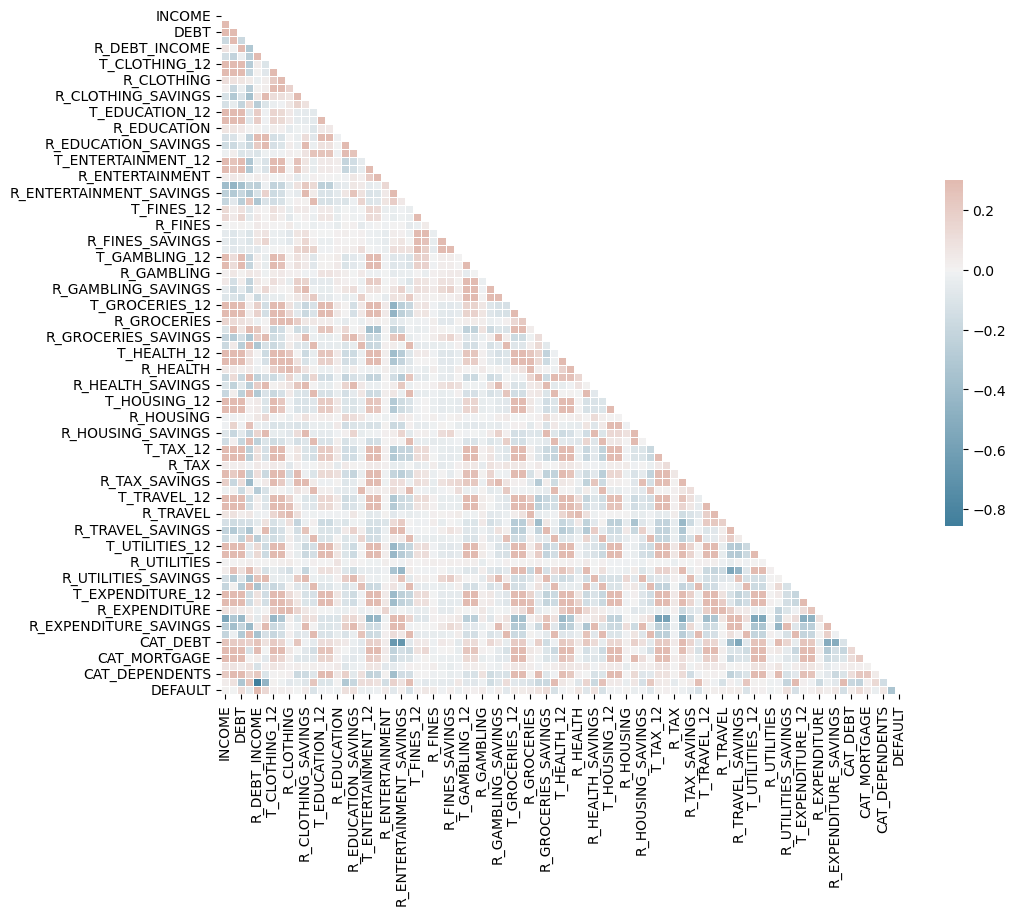

In [85]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

array([[<AxesSubplot: title={'center': 'INCOME'}>,
        <AxesSubplot: title={'center': 'SAVINGS'}>,
        <AxesSubplot: title={'center': 'DEBT'}>,
        <AxesSubplot: title={'center': 'R_SAVINGS_INCOME'}>,
        <AxesSubplot: title={'center': 'R_DEBT_INCOME'}>,
        <AxesSubplot: title={'center': 'R_DEBT_SAVINGS'}>],
       [<AxesSubplot: title={'center': 'T_CLOTHING_12'}>,
        <AxesSubplot: title={'center': 'T_CLOTHING_6'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING_INCOME'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING_SAVINGS'}>,
        <AxesSubplot: title={'center': 'R_CLOTHING_DEBT'}>],
       [<AxesSubplot: title={'center': 'T_EDUCATION_12'}>,
        <AxesSubplot: title={'center': 'T_EDUCATION_6'}>,
        <AxesSubplot: title={'center': 'R_EDUCATION'}>,
        <AxesSubplot: title={'center': 'R_EDUCATION_INCOME'}>,
        <AxesSubplot: title={'center': 'R_EDUCATION_SAVINGS'}>,
        <Axes

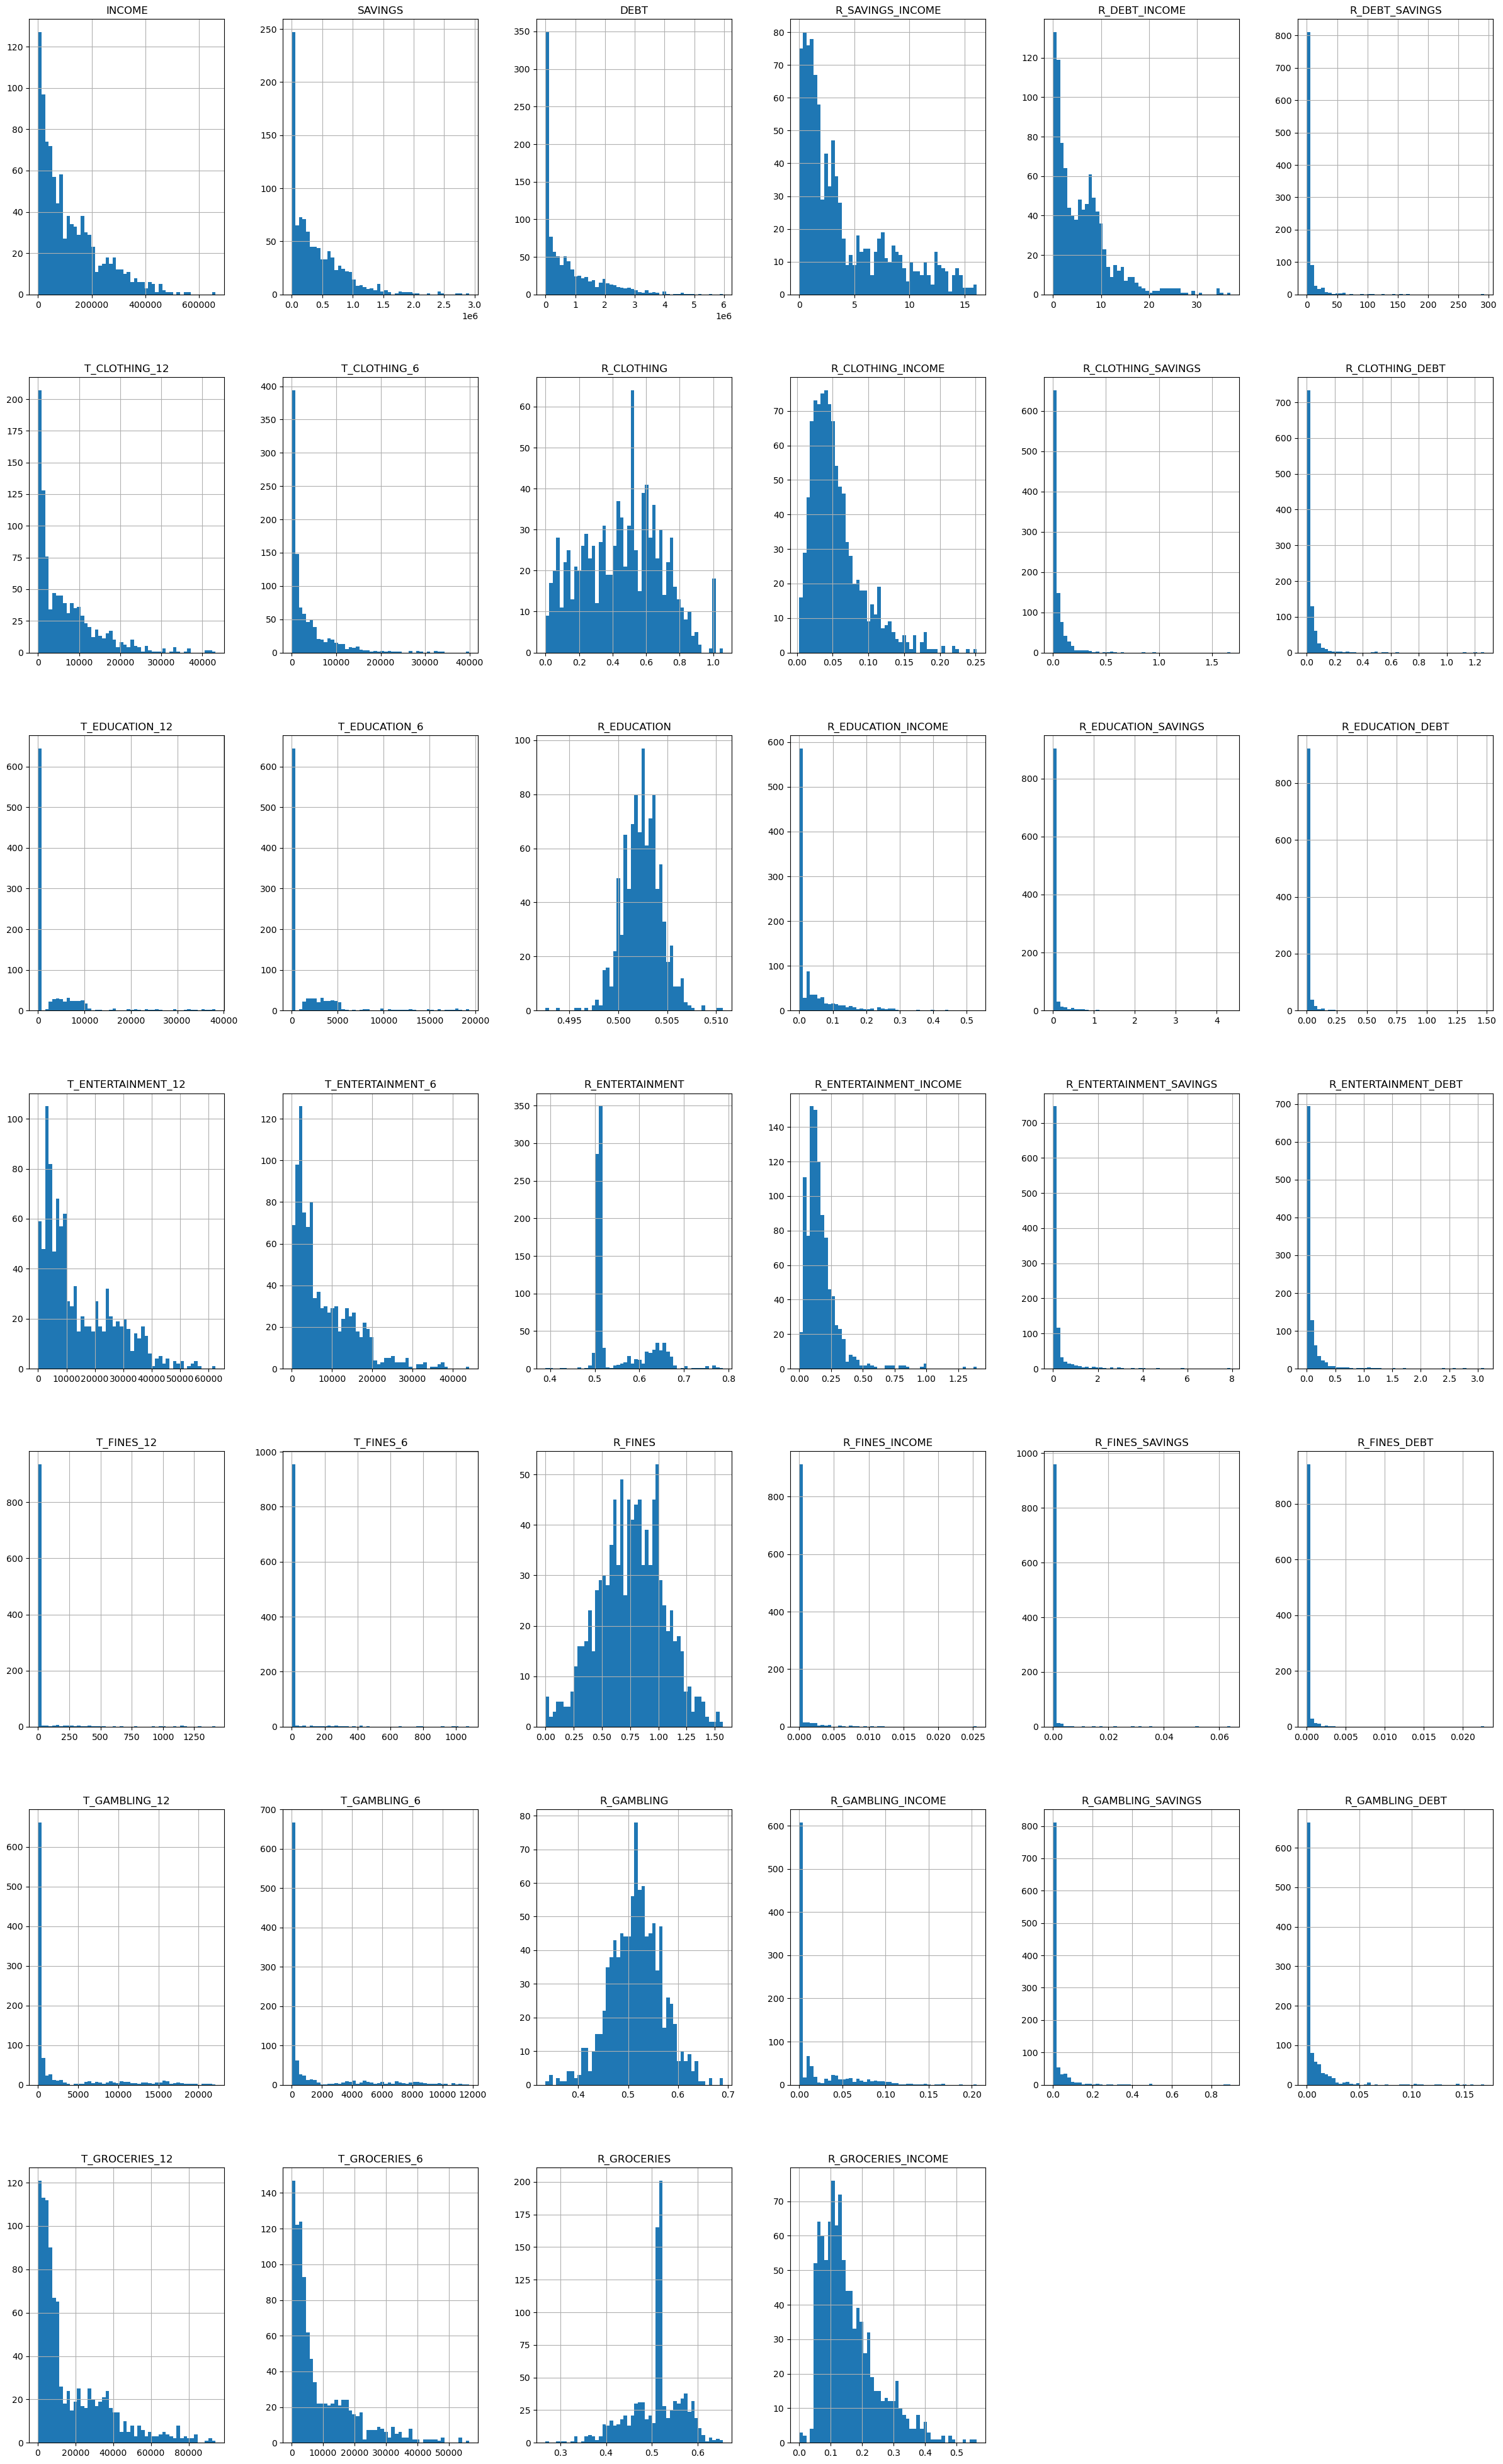

In [8]:
data.hist(bins=50, figsize=(30,50))

In [21]:
columnsClothing = ['T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING', 
                   'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT', 
                   'INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME',
                   'R_DEBT_INCOME', 'R_DEBT_SAVINGS', 'CAT_GAMBLING',
                   'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT',
                   'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT']

data[columnsClothing]


T_CLOTHING_12  T_CLOTHING_6  R_CLOTHING  R_CLOTHING_INCOME  \
0             1889           945      0.5003             0.0568   
1             5818           111      0.0191             0.0754   
2             1157           860      0.7433             0.0374   
3             6857          3686      0.5376             0.0850   
4             1978           322      0.1628             0.0132   
..             ...           ...         ...                ...   
995          16701         10132      0.6067             0.0508   
996           5400          1936      0.3585             0.0663   
997              0             0      0.8779             0.0047   
998           1993          1271      0.6377             0.0553   
999           1574          1264      0.8030             0.0356   

     R_CLOTHING_SAVINGS  R_CLOTHING_DEBT  INCOME  SAVINGS     DEBT  \
0                0.0000           0.0035   33269        0   532304   
1                0.0638           0.0184   77158    91187   315648   
2                0.0535           0.0022   30917    21642   534864   
3                0.1063           0.0109   80657    64526   629125   
4                0.0017           0.0008  149971  1172498  2399531   
..                  ...              ...     ...      ...      ...   
995              0.0114           0.0030  328892  1465066  5501471   
996              0.0608           0.0079   81404    88805   680837   
997              0.0000           0.0000       0    42428    30760   
998              0.2491           0.0033   36011     8002   604181   
999              0.0051           0.0356   44266   309859    44266   

     R_SAVINGS_INCOME  R_DEBT_INCOME  R_DEBT_SAVINGS CAT_GAMBLING  CAT_DEBT  \
0              0.0000        16.0000          1.2000         High         1   
1              1.1818         4.0909          3.4615           No         1   
2              0.7000        17.3000         24.7142         High         1   
3              0.8000         7.8000          9.7499         High         1   
4              7.8182        16.0000          2.0465         High         1   
..                ...            ...             ...          ...       ...   
995            4.4546        16.7273          3.7551         High         1   
996            1.0909         8.3637          7.6667           No         1   
997            3.2379         8.1889          0.7250           No         1   
998            0.2222        16.7777         75.5037           No         1   
999            6.9999         1.0000          0.1429           No         1   

     CAT_CREDIT_CARD  CAT_MORTGAGE  CAT_SAVINGS_ACCOUNT  CAT_DEPENDENTS  \
0                  0             0                    0               0   
1                  0             0                    1               0   
2                  0             0                    1               0   
3                  0             0                    1               0   
4                  1             1                    1               1   
..               ...           ...                  ...             ...   
995                1             1                    1               1   
996                0             0                    1               0   
997                0             0                    1               0   
998                1             0                    1               0   
999                0             0                    1               0   

     CREDIT_SCORE  DEFAULT  
0             444        1  
1             625        0  
2             469        1  
3             559        0  
4             473        0  
..            ...      ...  
995           418        0  
996           589        1  
997           499        0  
998           507        0  
999           657        0  

[1000 rows x 20 columns]

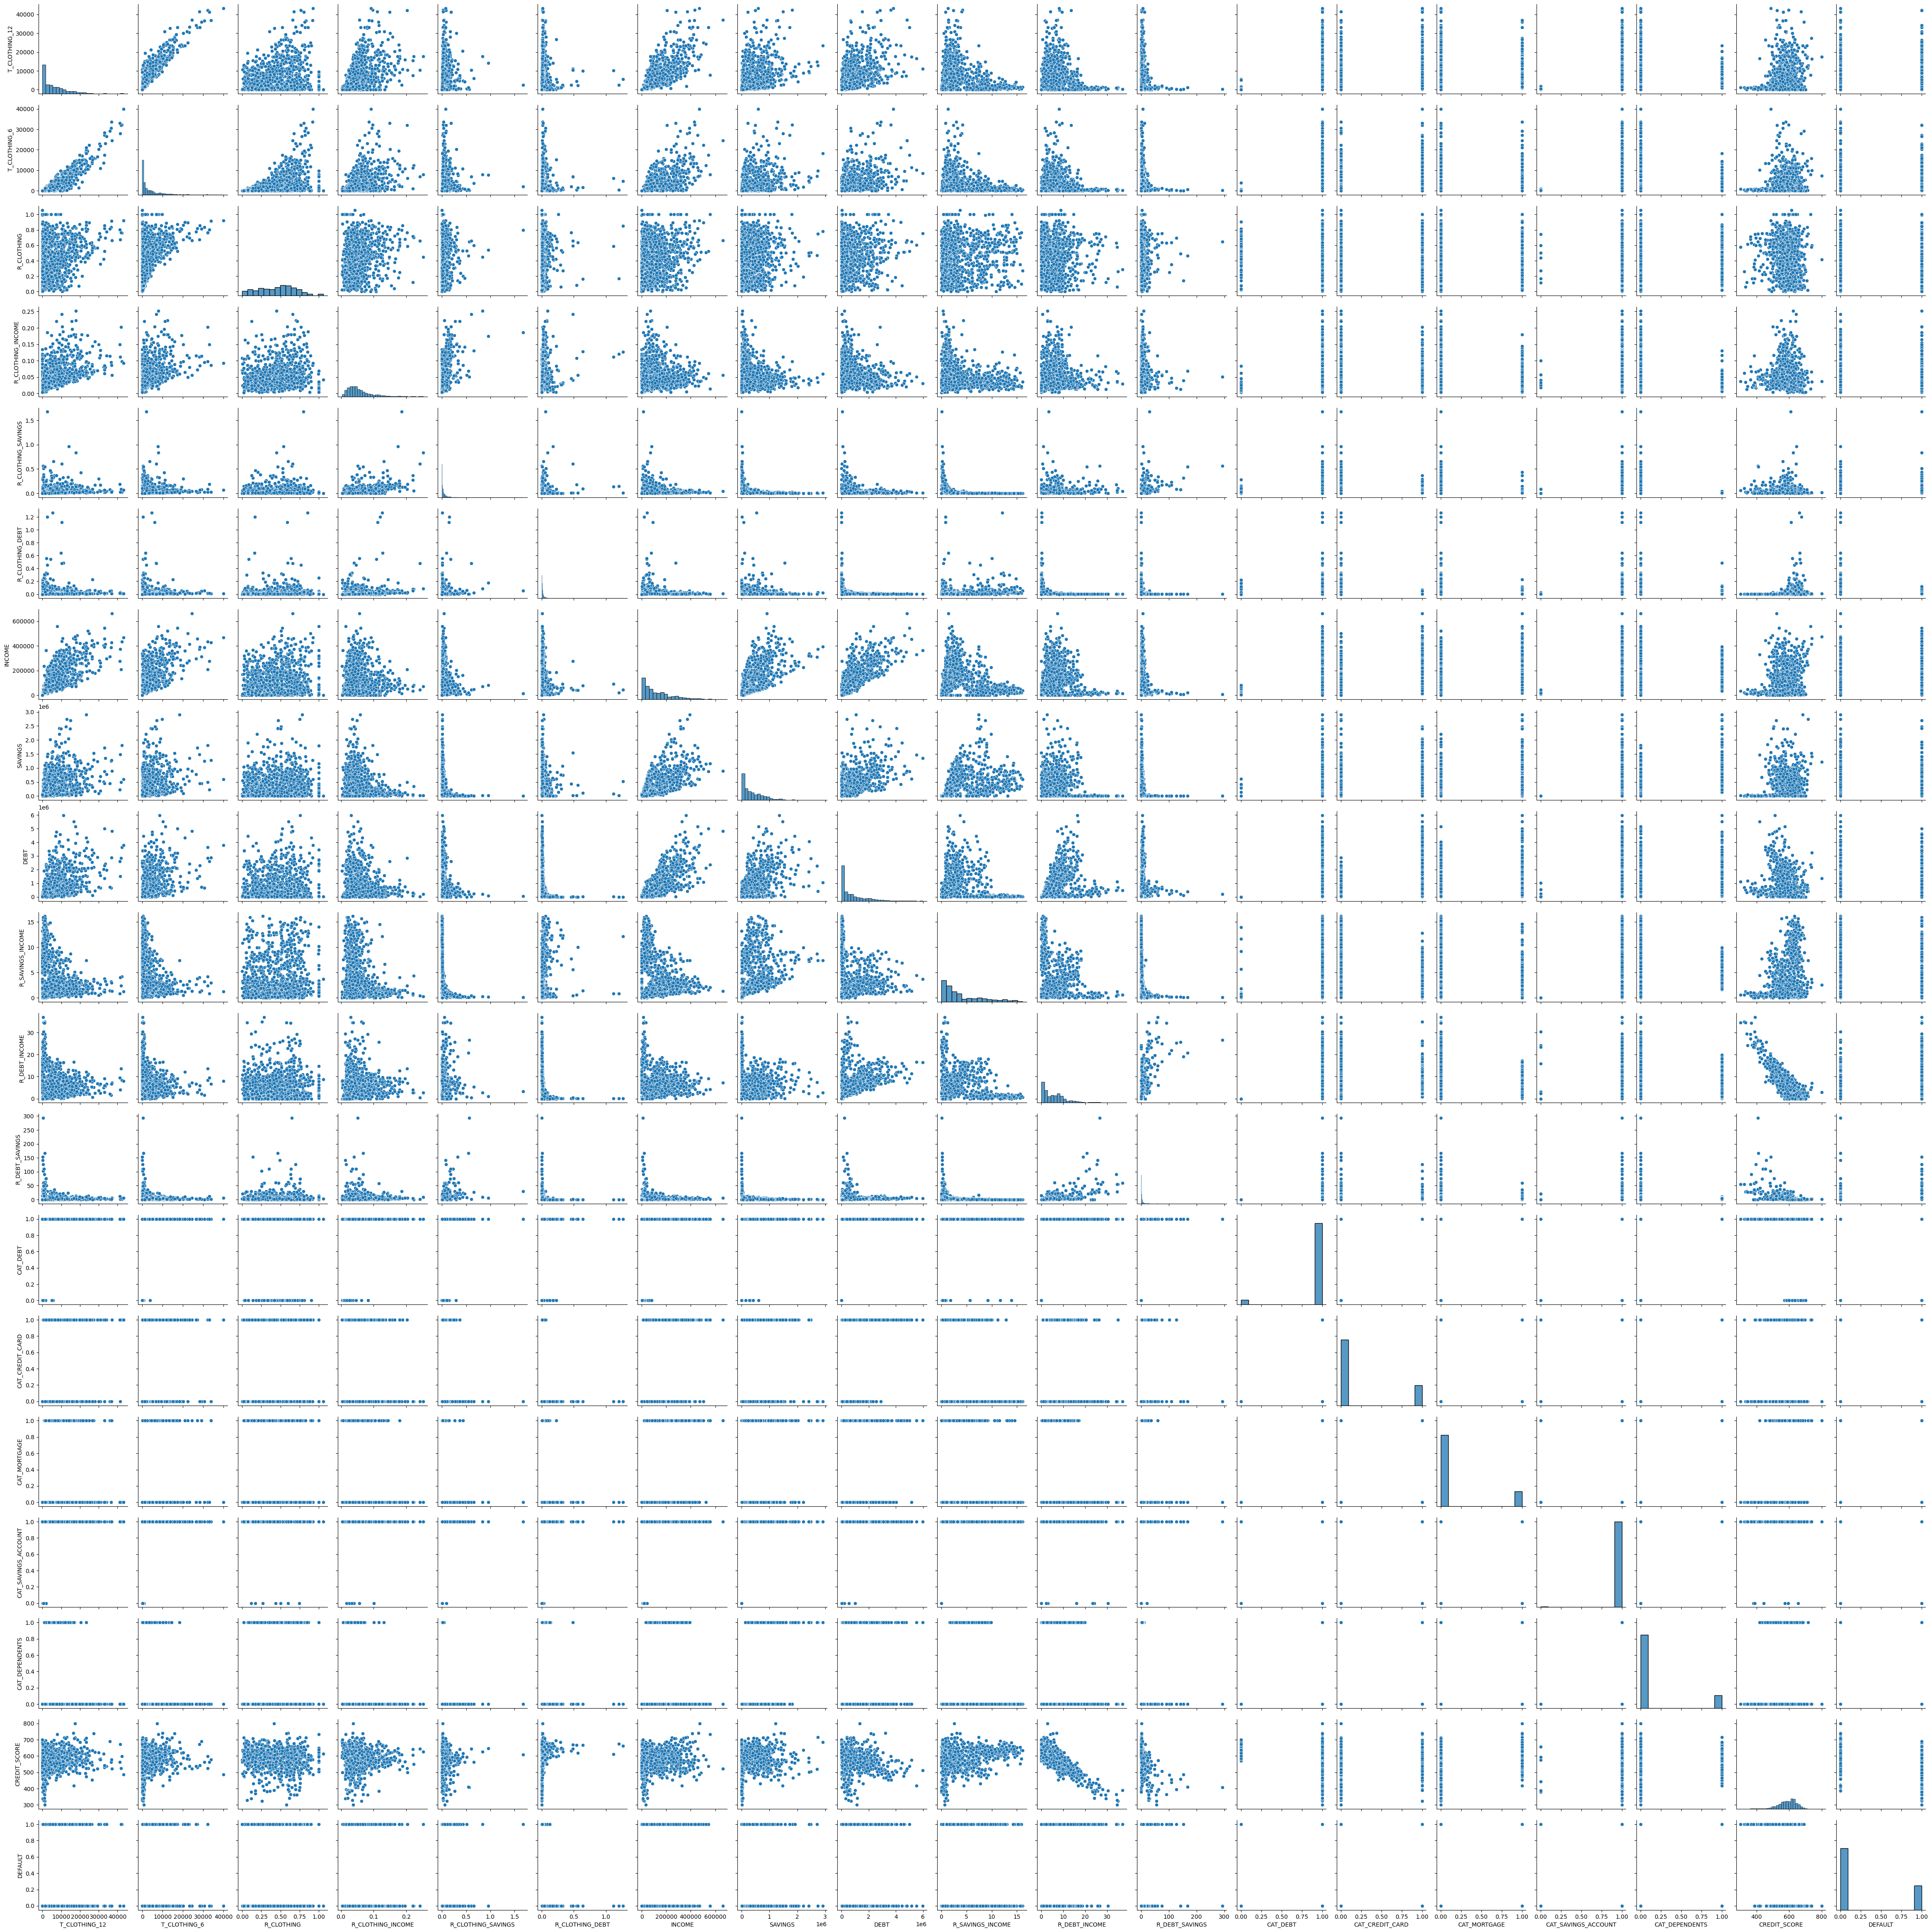

In [22]:
# Create a scatter plot for each pair of features
dataScatter = data[columnsClothing]
sns.pairplot(dataScatter)

/var/folders/y9/p941jysn0ddb8zkx38rpntd80000gn/T/ipykernel_18901/3476984283.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

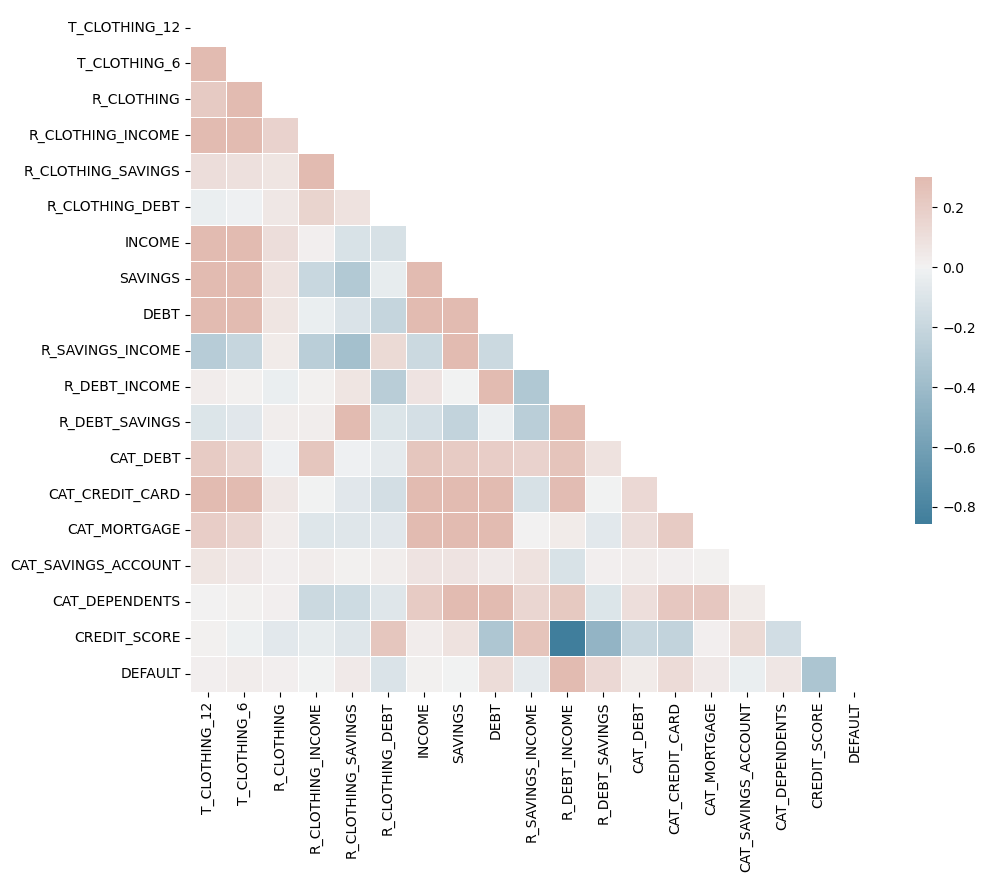

In [23]:
corr = dataScatter.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [103]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = pd.read_csv('data/credit_score.csv')

X = data.drop(columns=['CUST_ID', 'CAT_GAMBLING', 'CREDIT_SCORE', 'DEFAULT'])
X['R_ENTERTAINMENT_GROCERIES'] = X['R_ENTERTAINMENT'] / X['R_GROCERIES']

# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

y = data['CREDIT_SCORE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} MSE:', mse)


Random Forest MSE: 889.3296794999999


In [98]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print('(R^2 score):', r2)


(R^2 score): 0.7759485439279658
